<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula1b_adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np

def criaDataset(n=20, slop=[2,1], intercept=0):
  X = np.random.uniform(size=(n,2))
  AUX = np.multiply(X, slop)-[0, intercept]
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
  return X, y

slop=[-1,2]
intercept = 1
X, y = criaDataset(slop=slop, intercept=intercept)
X, y

(array([[0.68332091, 0.00910042],
        [0.20944627, 0.40586675],
        [0.73065338, 0.29795715],
        [0.34555415, 0.62424779],
        [0.29121566, 0.8021607 ],
        [0.18441437, 0.90237628],
        [0.94691548, 0.09184879],
        [0.7685227 , 0.24319312],
        [0.19692743, 0.73029192],
        [0.68283187, 0.71559468],
        [0.28945077, 0.1017821 ],
        [0.78796516, 0.52146498],
        [0.12057291, 0.21214426],
        [0.10152359, 0.9193208 ],
        [0.41574611, 0.47174378],
        [0.83774132, 0.05925923],
        [0.57785182, 0.45261214],
        [0.22696842, 0.90748782],
        [0.88062791, 0.3593823 ],
        [0.16325633, 0.20999334]]),
 array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,
        -1, -1,  1]))

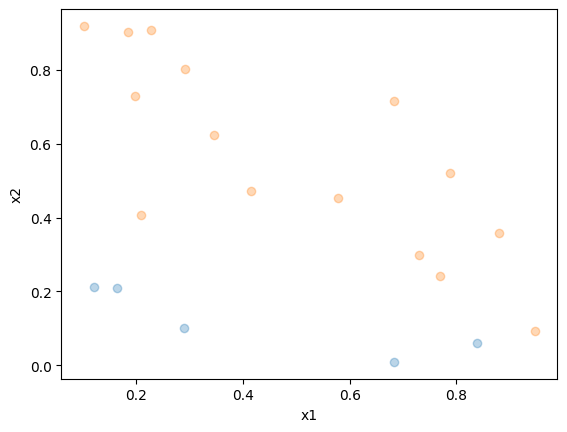

In [122]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.xlabel('x1')
  plt.ylabel('x2')
  for k in set(y):
    plt.plot(X[:,0][y==k],X[:,1][y==k], 'o', alpha=0.3)

plotDataset(X, y)

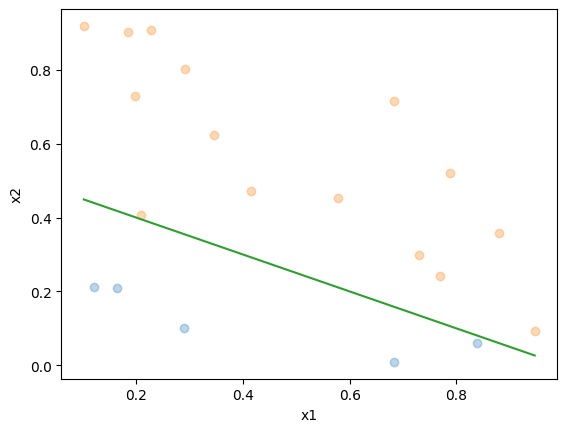

In [123]:
def plotHiperplano(X, y, vetor, intercept=0):
  x0min = min(X[:,0])
  x0max = max(X[:,0])
  xs = np.linspace(x0min, x0max, num=2)
  ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
  plt.plot(xs, ys)

plotDataset(X, y)
vetor_hiperplano = np.array(slop) * np.array([1, -1])
plotHiperplano(X, y, vetor_hiperplano, intercept)

In [124]:
def sign(a):
  return (a >= 0) * 2 -1

0.9
[ 1.46029614 -1.62170107 -2.64903411]


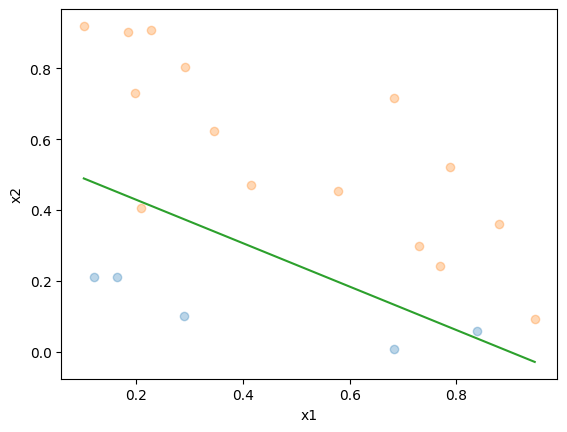

In [125]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def include_bias(X):
  bias = np.ones((X.shape[0],1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100, learning_rate=0.05):
    self.w = None
    self.activation = sign
    self.max_iter = max_iter
    self.learning_rate = learning_rate

  def fit(self, X, y):
    Xb = include_bias(X)
    #''' Widrow-Hoff
    self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.max_iter):
      ypred = self.__pre_activation(X)
      erros = y - ypred
      custo = sum(erros**2)
      if custo == 0:
        break
      self.w += (Xb.T @ erros) * self.learning_rate
    '''# Pseudoinversa
    self.w = np.linalg.pinv(Xb) @ y
    #'''

  def __pre_activation(self, X):
    Xb = include_bias(X)
    return Xb @ self.w

  def predict(self, X):
    a = self.__pre_activation(X)
    ypred = self.activation(a)
    return ypred

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(accuracy_score(y, ypred))
print(perceptron.w)
plotDataset(X, y)
# plotDataset(X, ypred)
plotHiperplano(X, y, perceptron.w[1:], perceptron.w[0])

0.975
[ 1.46029614 -1.62170107 -2.64903411]


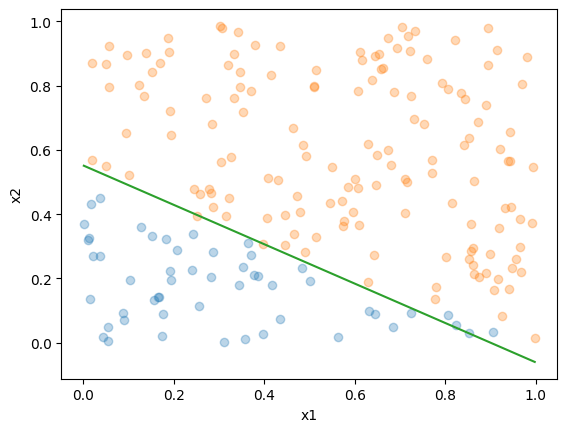

In [126]:
Xte, yte = criaDataset(200, slop, intercept)
ypred = perceptron.predict(Xte)
print(accuracy_score(yte, ypred))
print(perceptron.w)
plotDataset(Xte, yte)
# plotDataset(X, ypred)
plotHiperplano(Xte, yte, perceptron.w[1:], perceptron.w[0])